# Treinamento dos Modelos de Machine Learning

Importação das bibliotecas

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

Carregamento dos dados de treinamento e teste

In [2]:
def load_pickle(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)


X_train = load_pickle('./Dados Preparados/X_train.pkl')
y_train = load_pickle('./Dados Preparados/y_train.pkl')
X_test = load_pickle('./Dados Preparados/X_test.pkl')
y_test = load_pickle('./Dados Preparados/y_test.pkl')

Função para imprimir a matriz de confusão

In [3]:
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.title(title)
    plt.show()

Transformação das variáveis importadas para o formato de array do Numpy

In [4]:
X_train = np.array(X_train, copy=True)
y_train = np.array(y_train, copy=True)
y_test = np.array(y_test, dtype=int)

## Random Forest

O Random Forest é um modelo de aprendizado de máquina baseado em um conjunto de árvores de decisão. Ele utiliza o princípio de ensemble, onde múltiplas árvores independentes são combinadas para melhorar a precisão e reduzir o risco de overfitting. O Random Forest é ideal para dados com características tanto numéricas quanto categóricas, e também oferece insights sobre a importância das variáveis.

### Treinamento do Modelo

Definição da grade de parâmetros que será utilizada pelo Grid Search para buscar os melhores hiperparâmetros para o modelo

In [5]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [6]:
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

O modelo de Random Forest foi instanciado, assim como o Grid Search. Após isso, foi realizado o treinamento, que incluiu a técnica de Cross Validation

### Avaliação

Realizando predições com o conjunto de dados de teste utilizando os melhores parâmetros encontrados pelo Grid Search

In [7]:
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

In [8]:
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rf))

Acurácia: 0.9744525547445255
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       308
           1       0.98      0.98      0.98       514

    accuracy                           0.97       822
   macro avg       0.97      0.97      0.97       822
weighted avg       0.97      0.97      0.97       822



Acima, podemos ver a acurácia do modelo durante os testes e o relatório de classificação

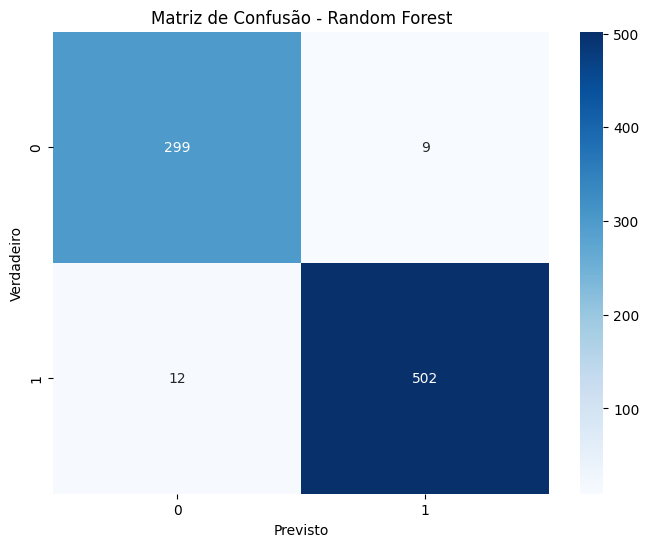

In [9]:
plot_confusion_matrix(y_test, y_pred_rf, "Matriz de Confusão - Random Forest")

## XGBoost

XGBoost é uma implementação de boosting que constrói árvores de decisão sequenciais, corrigindo os erros das árvores anteriores. Ele é altamente eficaz em capturar padrões complexos e pode ser ajustado para evitar overfitting por meio de parâmetros como taxa de aprendizado e profundidade das árvores

### Treinamento do Modelo

Criando o grid de parâmetros que será utilizado pelo Grid Search

In [10]:
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [11]:
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
grid_xgb = GridSearchCV(xgb, xgb_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

O modelo e o Grid Search foram instanciados, e em seguida ocorreu o treinamento

### Avaliação

Realizando a predição com os dados de teste, fornecendo ao modelo os melhores hiperparâmetros encontrados

In [12]:
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

Abaixo, são impressos a acurácia, o relatório de classificação e a matriz de confusão para o XGBoost

In [13]:
print("Acurácia:", accuracy_score(y_test, y_pred_xgb))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_xgb))

Acurácia: 0.9781021897810219
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       308
           1       0.99      0.98      0.98       514

    accuracy                           0.98       822
   macro avg       0.97      0.98      0.98       822
weighted avg       0.98      0.98      0.98       822



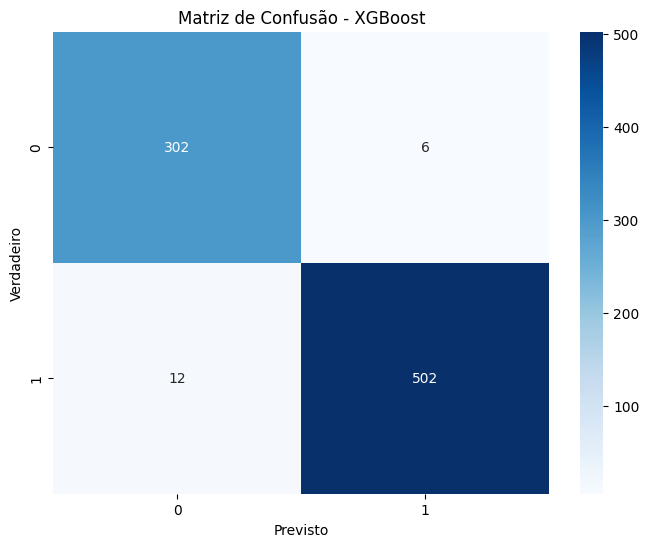

In [14]:
plot_confusion_matrix(y_test, y_pred_xgb, "Matriz de Confusão - XGBoost")

## Support Vector Machine - SVM

O SVM é um modelo baseado em encontrar a linha (ou hiperplano) que melhor separa as classes no espaço de características. Ele é eficaz para problemas com margens bem definidas e pode ser ajustado com diferentes kernels para lidar com dados não lineares. O SVM é robusto a outliers e pode ser muito eficaz em problemas com alta dimensionalidade

### Treinamento do Modelo

A seguir, a grade de parâmetros é criada, com os valores que serão combinados pelo Grid Search

In [15]:
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [16]:
svm = SVC(random_state=42)
grid_svm = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

O modelo e o Grid Search foram instanciados e ocorreu o treinamento do modelo

### Avaliação

Abaixo, podemos observar a acurácia, as métricas de avaliação presentes no relatório de classificação e o gráfico da matriz de confusão

In [17]:
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

In [18]:
print("Acurácia:", accuracy_score(y_test, y_pred_svm))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_svm))

Acurácia: 0.9391727493917275
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       308
           1       0.97      0.93      0.95       514

    accuracy                           0.94       822
   macro avg       0.93      0.94      0.94       822
weighted avg       0.94      0.94      0.94       822



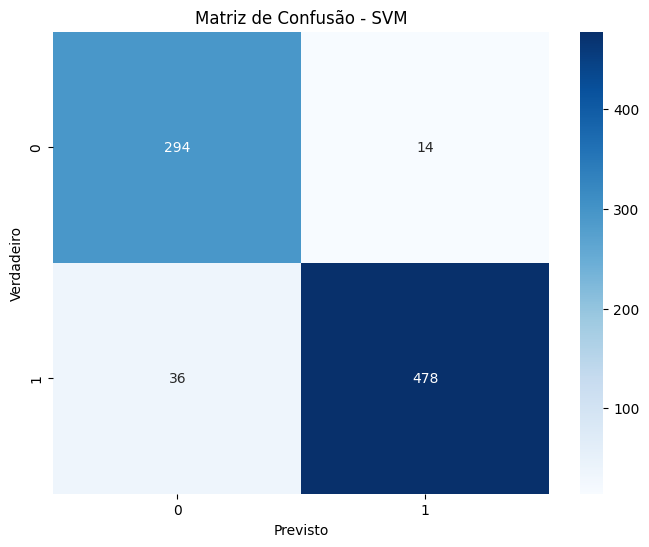

In [19]:
plot_confusion_matrix(y_test, y_pred_svm, "Matriz de Confusão - SVM")

# Avaliação dos Resultados

As métricas utilizadas para avaliar os modelos foram:

- **Acurácia**: Porcentagem geral de acertos do modelo em relação a todas as previsões realizadas
- **Precisão**: Proporção de acertos do modelo em relação ao número de previsões realizadas para cada classe
- **Recall**: Proporção de acertos do modelo em relação ao total de exemplos reais de cada classe

Além disso, para cada modelo testado, foram contabilizadas as quantidades de:
- **Verdadeiros Positivos**: Casos em que o modelo previu corretamente uma aprovação
- **Verdadeiros Negativos**: Casos em que o modelo previu corretamente uma reprovação
- **Falsos Positivos**: O modelo previu erroneamente uma aprovação quando na verdade o caso era uma reprovação
- **Falsos Negativos**: O modelo previu erroneamente uma reprovação quando na verdade o caso era uma aprovação

## Resultados

### Random Forest

**Acurácia**: 97,44%

**Precisão**:
- 96% para empréstimos rejeitados
- 98% para empréstimos aprovados

**Recall**:
- 97% para empréstimos rejeitados
- 98% para empréstimos aprovados

**Verdadeiros Positivos**: 502  
**Verdadeiros Negativos**: 299  
**Falsos Positivos**: 9    
**Falsos Negativos**: 12

### XGBoost

**Acurácia**: 97,81%

**Precisão**:
- 96% para empréstimos rejeitados
- 99% para empréstimos aprovados

**Recall**:
- 98% para empréstimos rejeitados
- 98% para empréstimos aprovados

**Verdadeiros Positivos**: 502  
**Verdadeiros Negativos**: 302  
**Falsos Positivos**: 6    
**Falsos Negativos**: 12

### SVM

**Acurácia**: 93,91%

**Precisão**:
- 89% para empréstimos rejeitados
- 97% para empréstimos aprovados

**Recall**:
- 95% para empréstimos rejeitados
- 93% para empréstimos aprovados

**Verdadeiros Positivos**: 478  
**Verdadeiros Negativos**: 294  
**Falsos Positivos**: 14    
**Falsos Negativos**: 36

## Análise e Escolha do Modelo Final

Os três modelos analisados demonstraram desempenho satisfatório na etapa de testes, atingindo acurácias superiores a 90%, o que indica sua eficácia geral na tarefa proposta. O Random Forest quanto o XGBoost apresentaram performances muito próximas, com métricas de precisão e recall bastante consistentes. Por outro lado, o modelo SVM, apesar de também apresentar um bom desempenho, ficou ligeiramente atrás em termos de acurácia e apresentou uma taxa de erro mais alta em comparação com os outros dois.

Com base nos resultados, o modelo selecionado para implementação em ambiente de produção é o XGBoost. Essa escolha foi fundamentada não apenas pela alta acurácia apresentada, mas também pelo menor número de falsos positivos identificados durante os testes.

# Exportação do Modelo Final

O código abaixo exporta um arquivo pickle com o modelo final que será utilizado para realizar predições

In [20]:
with open('modelo.pkl', 'wb') as model_file:
    pickle.dump(best_xgb, model_file)